In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm

sns.set_style('darkgrid')
%matplotlib inline

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Time%20series%20analysis/Electric_Production.csv")

data['DATE'] = pd.to_datetime(data['DATE'])
data = data.rename(columns = {'DATE':'date'})
data = data.set_index('date')
data

,Value
date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [4]:
data.describe()

,Value
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


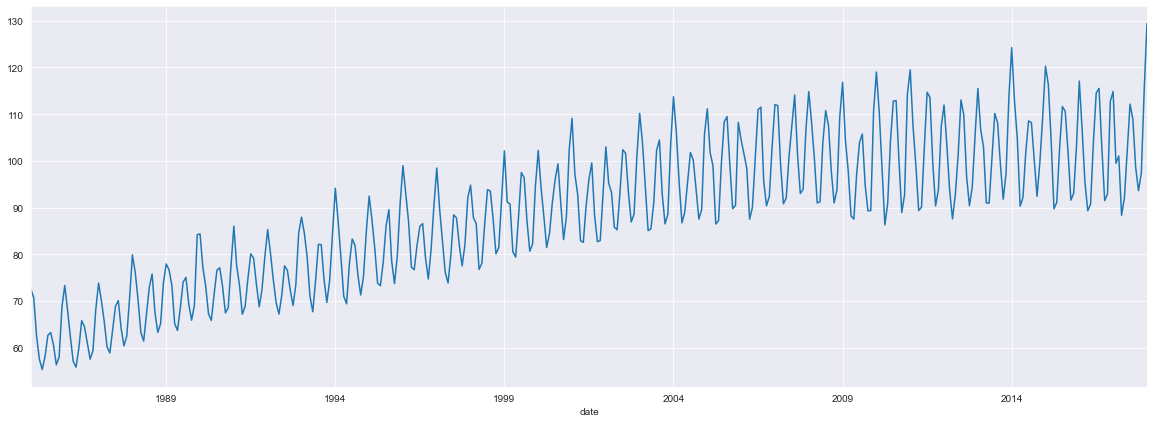

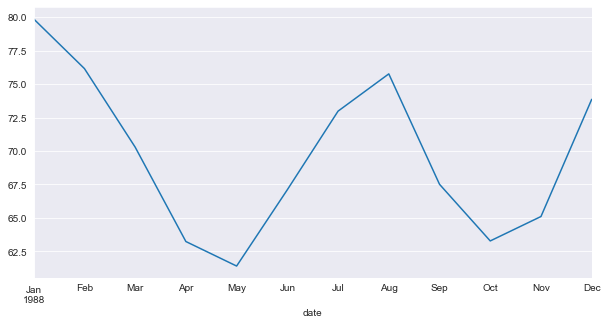

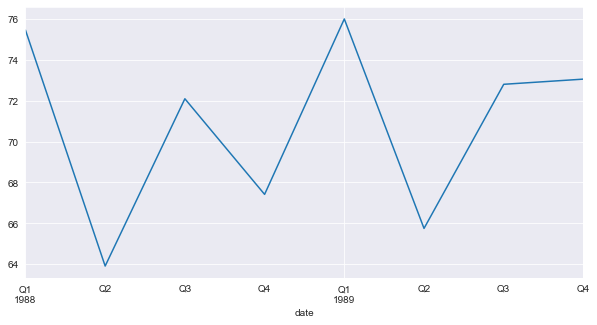

In [5]:
plt.figure(figsize = (20,7))
data['Value'].plot(kind = 'line')
plt.show()

plt.figure(figsize = (10,5))
data['1988':'1988'].resample('m').mean()['Value'].plot(kind = 'line')
plt.show()

plt.figure(figsize = (10,5))
data['1988':'1989'].resample('q').mean()['Value'].plot(kind = 'line')
plt.show()

In [6]:
adftest = adfuller(data['Value'])
adftest

(-2.2569903500472366,
 0.18621469116587053,
 15,
 381,
 {'1%': -3.4476305904172904,
  '5%': -2.869155980820355,
  '10%': -2.570827146203181},
 1840.8474501627156)

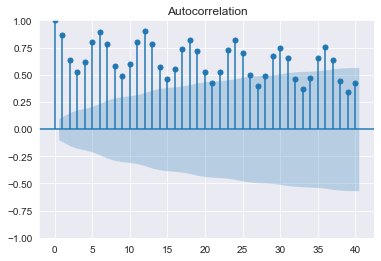

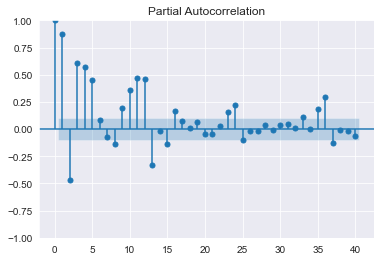

In [7]:
acf = plot_acf(data,lags=40)
pacf = plot_pacf(data,lags=40, method='ols')

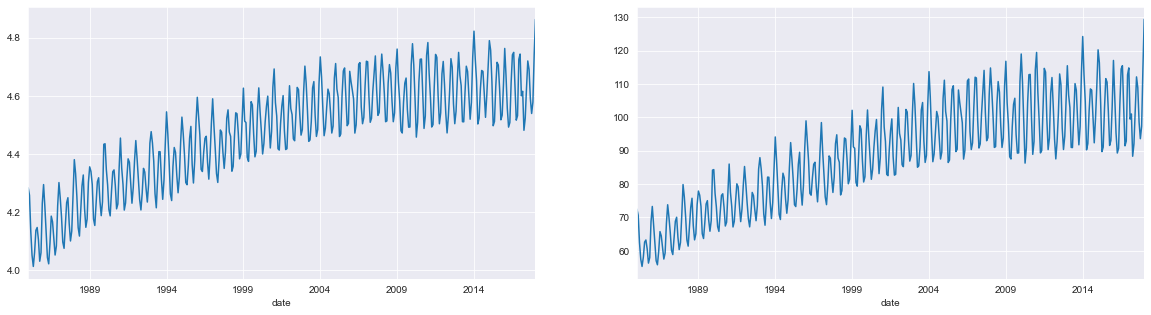

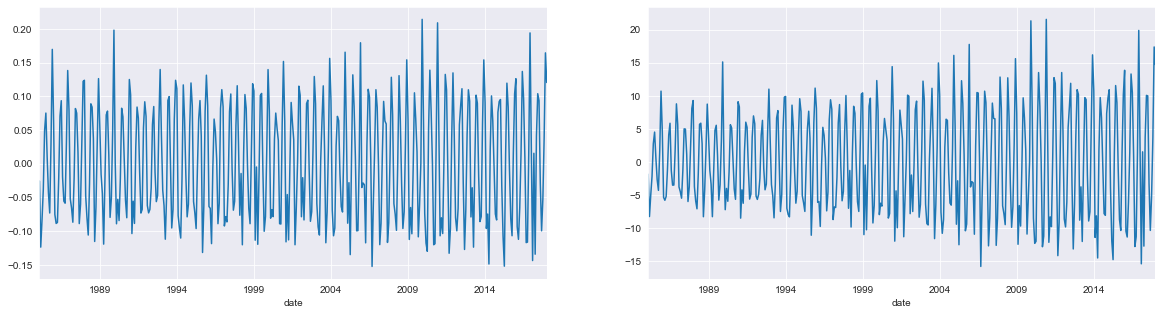

In [8]:
temp = pd.DataFrame(np.log(data['Value']))
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
temp['Value'].plot(kind = 'line')
plt.subplot(1,2,2)
data['Value'].plot(kind = 'line')
plt.show()

plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
temp['Value'].diff(1).dropna().plot()
plt.subplot(1,2,2)
data['Value'].diff(1).dropna().plot()
plt.show()

In [9]:
kptest = kpss(temp['Value'].diff(1).dropna(),'c')
kptest

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.11412038097885754,
 0.1,
 34,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

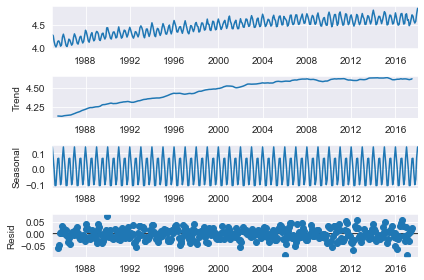

In [10]:
add_plot = sm.tsa.seasonal_decompose(temp,model = 'additive')
add_plot = add_plot.plot()